In [5]:
! pip install citipy

In [6]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
# Import the time library and the datetime module from the datetime library 
import time


In [28]:
from citipy import citipy
from datetime import datetime
from scipy.stats import linregress

In [8]:
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

In [9]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
# Add the latitudes and longitudes to a list.
lat_lngs = zip(lats, lngs)
coordinates = list(lat_lngs)
lat_lngs

In [19]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

581

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [30]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
weather_response=requests.get(city_url)
weather_json=weather_response.json()
weather_json.keys()

In [9]:
# weather_json.get("main")
# weather_json

In [8]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [9]:
# Get the text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 32.45,
  'feels_like': 26.76,
  'temp_min': 26.58,
  'temp_max': 36.75,
  'pressure': 1021,
  'humidity': 44},
 'visibility': 10000,
 'wind': {'speed': 5.99, 'deg': 347, 'gust': 15.01},
 'clouds': {'all': 5},
 'dt': 1637809014,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1637754384,
  'sunset': 1637788561},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [10]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [11]:
# Get the JSON data.
boston_data = city_weather.json()

In [12]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 36.75 44 5 5.99


In [13]:
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2021-11-25 02:56:54'

In [18]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1
# Loop through all the cities in the list.
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | kudahuvadhoo
Processing Record 3 of Set 1 | atuona
Processing Record 4 of Set 1 | esperance
Processing Record 5 of Set 1 | iraquara
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | presidencia roque saenz pena
Processing Record 8 of Set 1 | papara
Processing Record 9 of Set 1 | hofn
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | barrow
Processing Record 12 of Set 1 | bluff
Processing Record 13 of Set 1 | oussouye
Processing Record 14 of Set 1 | butaritari
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | sandeid
Processing Record 17 of Set 1 | moron
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | chuy
Processing Record 20 of Set 1 | kamenskoye
City not found. Skipping...
Processing Record 21 of Set 1 | lagoa
Processing Record 22 of Set 1 | pochutla
Processing Recor

Processing Record 39 of Set 4 | turan
Processing Record 40 of Set 4 | bubaque
Processing Record 41 of Set 4 | kachikau
City not found. Skipping...
Processing Record 42 of Set 4 | salisbury
Processing Record 43 of Set 4 | port augusta
Processing Record 44 of Set 4 | san patricio
Processing Record 45 of Set 4 | guaruja
Processing Record 46 of Set 4 | nicolas bravo
Processing Record 47 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 48 of Set 4 | whitehorse
Processing Record 49 of Set 4 | klaksvik
Processing Record 50 of Set 4 | poltavka
Processing Record 1 of Set 5 | tamandare
Processing Record 2 of Set 5 | yangmei
Processing Record 3 of Set 5 | kaitangata
Processing Record 4 of Set 5 | tuktoyaktuk
Processing Record 5 of Set 5 | ancud
Processing Record 6 of Set 5 | sandnessjoen
Processing Record 7 of Set 5 | klembivka
Processing Record 8 of Set 5 | bojaya
City not found. Skipping...
Processing Record 9 of Set 5 | verkhnyaya sinyachikha
Processing Record 10 of Set 5 

Processing Record 23 of Set 8 | bathsheba
Processing Record 24 of Set 8 | berlevag
Processing Record 25 of Set 8 | santa luzia
Processing Record 26 of Set 8 | estelle
Processing Record 27 of Set 8 | norman wells
Processing Record 28 of Set 8 | mandera
Processing Record 29 of Set 8 | boende
Processing Record 30 of Set 8 | sao domingos do maranhao
Processing Record 31 of Set 8 | tevriz
Processing Record 32 of Set 8 | illapel
Processing Record 33 of Set 8 | isangel
Processing Record 34 of Set 8 | labrea
Processing Record 35 of Set 8 | katherine
Processing Record 36 of Set 8 | ixtapa
Processing Record 37 of Set 8 | lata
Processing Record 38 of Set 8 | pacific grove
Processing Record 39 of Set 8 | oranjemund
Processing Record 40 of Set 8 | cherskiy
Processing Record 41 of Set 8 | dikson
Processing Record 42 of Set 8 | baykit
Processing Record 43 of Set 8 | wegrow
Processing Record 44 of Set 8 | tutoia
Processing Record 45 of Set 8 | aktau
Processing Record 46 of Set 8 | ambodifototra
City n

Processing Record 14 of Set 12 | lashio
Processing Record 15 of Set 12 | khvoynaya
Processing Record 16 of Set 12 | azul
Processing Record 17 of Set 12 | humberto de campos
Processing Record 18 of Set 12 | preston
Processing Record 19 of Set 12 | batouri
Processing Record 20 of Set 12 | xiamen
Processing Record 21 of Set 12 | olinda
Processing Record 22 of Set 12 | boulder city
Processing Record 23 of Set 12 | iquique
Processing Record 24 of Set 12 | safita
Processing Record 25 of Set 12 | sakaraha
Processing Record 26 of Set 12 | zhongxing
Processing Record 27 of Set 12 | sorvag
City not found. Skipping...
Processing Record 28 of Set 12 | laranjeiras do sul
Processing Record 29 of Set 12 | bafra
Processing Record 30 of Set 12 | mount gambier
Processing Record 31 of Set 12 | kamaishi
Processing Record 32 of Set 12 | chiang kham
Processing Record 33 of Set 12 | sitangkai
Processing Record 34 of Set 12 | shihezi
Processing Record 35 of Set 12 | barawe
City not found. Skipping...
Processi

In [20]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.0752,-159.3190,80.58,70,1,1.01,US,2021-11-25 03:30:05
1,Kudahuvadhoo,2.6708,72.8944,81.63,69,90,15.57,MV,2021-11-25 03:30:06
2,Atuona,-9.8000,-139.0333,77.95,81,21,15.75,PF,2021-11-25 03:30:06
3,Esperance,-33.8667,121.9000,69.64,63,88,10.51,AU,2021-11-25 03:30:06
4,Iraquara,-12.2486,-41.6194,67.21,96,63,3.98,BR,2021-11-25 03:30:07
5,Vaini,-21.2000,-175.2000,84.36,84,75,8.05,TO,2021-11-25 03:30:07
6,Presidencia Roque Saenz Pena,-26.7852,-60.4388,77.65,64,52,5.30,AR,2021-11-25 03:30:08
7,Papara,-3.9839,-38.7273,81.72,90,72,3.22,BR,2021-11-25 03:30:08
8,Hofn,64.2539,-15.2082,30.22,65,100,3.36,IS,2021-11-25 03:30:09
9,Bredasdorp,-34.5322,20.0403,56.28,76,16,13.67,ZA,2021-11-25 03:30:09


In [63]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
# Get today's date in seconds.
today = time.strftime("%x")
today

'11/24/21'

In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

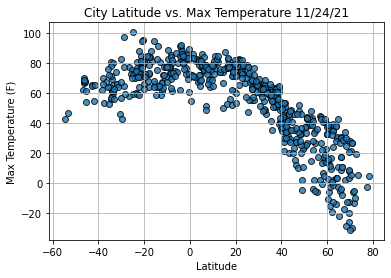

In [24]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

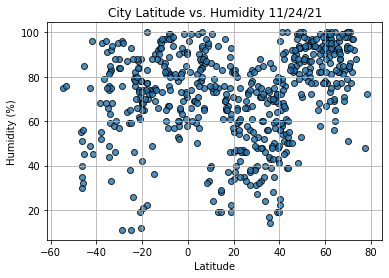

In [25]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

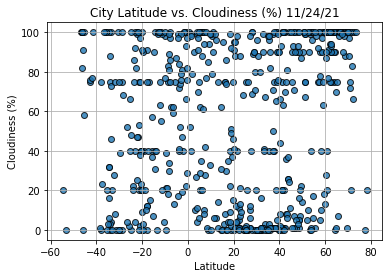

In [26]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

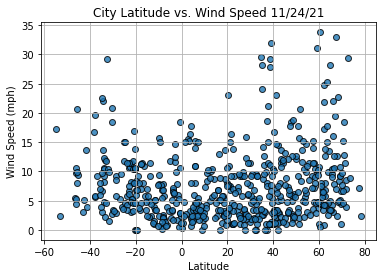

In [27]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [38]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [39]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

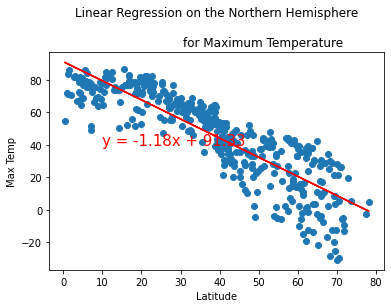

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       """Linear Regression on the Northern Hemisphere\n
                        for Maximum Temperature""", 'Max Temp',(10,40))

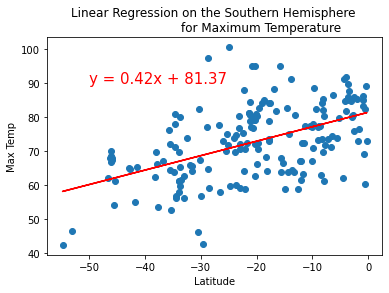

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n\
                        for Maximum Temperature', 'Max Temp',(-50,90))

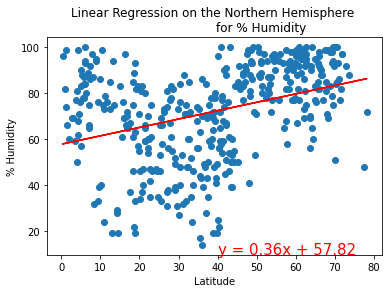

In [57]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n\
                        for % Humidity', '% Humidity',(40,10))

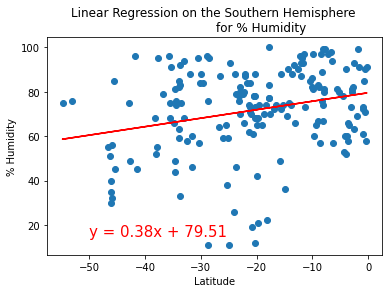

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n\
                        for % Humidity', '% Humidity',(-50,15))

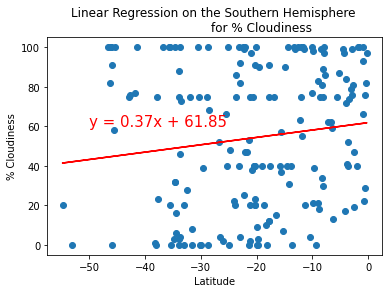

In [60]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n\
                        for % Cloudiness', '% Cloudiness',(-50,60))

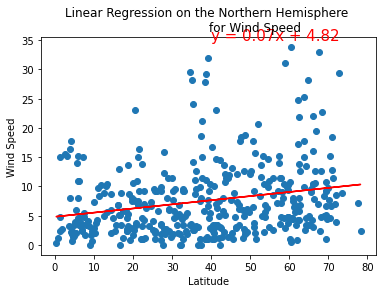

In [61]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n\
                        for Wind Speed', 'Wind Speed',(40,35))

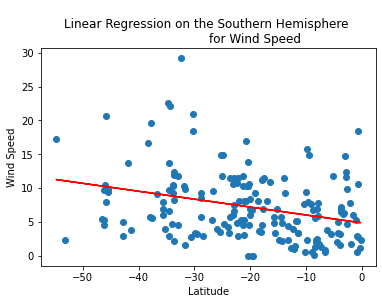

In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n\
                        for Wind Speed', 'Wind Speed',(-50,35))